In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchsummary import summary
from models.KANFormer import KANFormer
from utils import get_model_size

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# (self,HSI_bands=31,MSI_bands=3,hidden_dim=256,scale=4,depth=4,image_size=64)
myKAN = KANFormer(HSI_bands=31,MSI_bands=3,hidden_dim=256,scale=4,depth=4,image_size=64)
myKAN = myKAN.to(device)
model_dir = './trained_models/CAVEx2_epoch:999,PSNR:54.62.pth'
#model_dir = './trained_models/CAVEx4_epoch:999,PSNR:49.17.pth'
checkpoint = torch.load(model_dir)
myKAN.load_state_dict(checkpoint['net'], strict=False)
# Set for forward use
myKAN.eval()

/tmp/ipykernel_17540/3008780425.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_dir)


KANFormer(
  (fusion): Fusion(
    (hsi_kan): KANLinear(
      (base_activation): SiLU()
    )
    (msi_kan): KANLinear(
      (base_activation): SiLU()
    )
    (align_kan): KANLinear(
      (base_activation): SiLU()
    )
  )
  (layers): ModuleList(
    (0-3): 4 x KANBlock(
      (kan_layer_01): KANLinear(
        (base_activation): SiLU()
      )
      (kan_layer_02): KANLinear(
        (base_activation): SiLU()
      )
    )
  )
  (refine): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 31, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)

In [3]:
#from torchinfo import summary
from torchsummary import summary
summary(myKAN,input_size=[(31,16,16),(3,64,64)])

torch.Size([2, 31, 16, 16])
torch.Size([2, 31, 64, 64])
torch.Size([2, 4096, 31]) torch.Size([2, 4096, 3])
lrhsi to first KAN
X.size 31
31
X.shape torch.Size([8192, 31])
Base weight torch.float32
hrmsi to second KAN
X.size 3
3
X.shape torch.Size([8192, 3])
Base weight torch.float32
torch.Size([2, 4096, 256]) torch.Size([2, 4096, 256])
concatenated LR/HR to 3rd KAN
X.size 512
512
X.shape torch.Size([8192, 512])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32


In [4]:
model = KANFormer(scale=4,depth=4)
model = model.to(device)
checkpoint = torch.load(model_dir)
# model.load_state_dict(checkpoint['net'],strict=False)
# print(model['net']['fusion.hsi_kan.spline_weight'].shape)
# print(model['net']['fusion.hsi_kan.base_weight'].shape)
# print(model['net']['layers.0.kan_layer_01.spline_weight'].shape)


/tmp/ipykernel_17540/166662299.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_dir)


In [5]:
summary(model, input_size=[(31,16,16),(3,64,64)])

torch.Size([2, 31, 16, 16])
torch.Size([2, 31, 64, 64])
torch.Size([2, 4096, 31]) torch.Size([2, 4096, 3])
lrhsi to first KAN
X.size 31
31
X.shape torch.Size([8192, 31])
Base weight torch.float32
hrmsi to second KAN
X.size 3
3
X.shape torch.Size([8192, 3])
Base weight torch.float32
torch.Size([2, 4096, 256]) torch.Size([2, 4096, 256])
concatenated LR/HR to 3rd KAN
X.size 512
512
X.shape torch.Size([8192, 512])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([2, 256])
Base weight torch.float32


# Fuse mock data


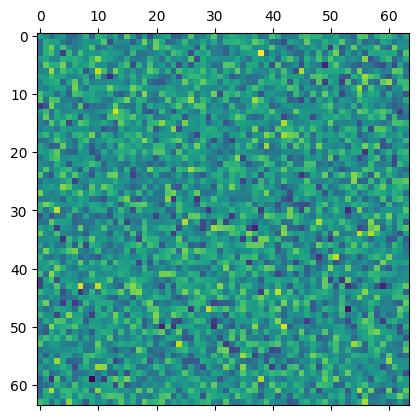

In [6]:
gt = np.random.binomial(100,0.7,size=((64,64,31)))
plt.matshow(gt[:,:,0])

dtype('float64')

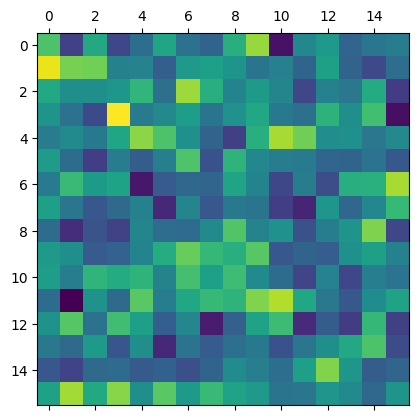

In [7]:
from skimage.transform import resize
from skimage.measure import block_reduce

lr_hs = resize(gt, (16, 16, 31), anti_aliasing=True)
plt.matshow(lr_hs[:,:,0])
lr_hs = lr_hs.reshape(1,31,16,16)
lr_hs.dtype


In [8]:
hr_ms = gt.reshape((1,31,64,64))[:,:3,:,:].astype(np.float64)
hr_ms.shape

(1, 3, 64, 64)

In [9]:
print(hr_ms.dtype)
print(lr_hs.dtype)

float64
float64


In [10]:
print(lr_hs.shape,hr_ms.shape)
print(torch.tensor(lr_hs).shape)
lr_hs_torch = torch.tensor(lr_hs, dtype=torch.float32).to(device)
hr_ms_torch = torch.tensor(hr_ms, dtype=torch.float32).to(device)
print(hr_ms_torch.dtype)
print(lr_hs_torch.dtype)

(1, 31, 16, 16) (1, 3, 64, 64)
torch.Size([1, 31, 16, 16])
torch.float32
torch.float32


In [11]:
fused = myKAN.forward(lr_hs_torch,hr_ms_torch)

torch.Size([1, 31, 16, 16])
torch.Size([1, 31, 64, 64])
torch.Size([1, 4096, 31]) torch.Size([1, 4096, 3])
lrhsi to first KAN
X.size 31
31
X.shape torch.Size([4096, 31])
Base weight torch.float32
hrmsi to second KAN
X.size 3
3
X.shape torch.Size([4096, 3])
Base weight torch.float32
torch.Size([1, 4096, 256]) torch.Size([1, 4096, 256])
concatenated LR/HR to 3rd KAN
X.size 512
512
X.shape torch.Size([4096, 512])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([1, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([1, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([1, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([1, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([1, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([1, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([1, 256])
Base weight torch.float32
X.size 256
256
X.shape torch.Size([1, 256])
Base weight torch.float32


In [12]:
fused_image = fused.cpu().detach().numpy()
print(fused_image.shape)
print(type(fused_image))


(1, 31, 64, 64)
<class 'numpy.ndarray'>


(64, 64, 31, 1)


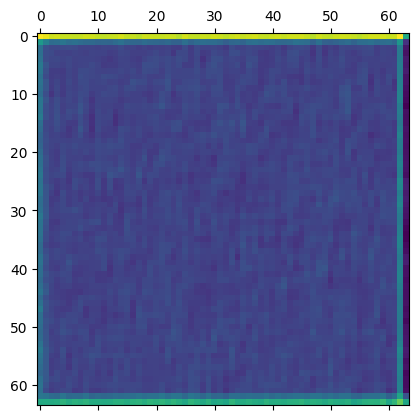

In [13]:
from einops import rearrange
fused_image = rearrange(fused_image,'b c h w -> h w c b')
print(fused_image.shape)
plt.matshow(fused_image[:,:,0,0])

# Chikusei

In [14]:
import rasterio
import spectral

# Specify the path to the ENVI data file and the file with .hdr
file = '/mnt/c/data/chikusei_ENVI/HyperspecVNIR_Chikusei_20140729.bsq'
header_file = '/mnt/c/data/chikusei_ENVI/HyperspecVNIR_Chikusei_20140729.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    print("Reading HS data")
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)

Reading HS data
Shape of hyperspectral data: (128, 2517, 2335)
Number of bands: 128


In [15]:
#Open the image with spectral
header_spectral = spectral.open_image(header_file)

# Access the wavelengths associated with each band
wavelengths = header_spectral.bands.centers

# Display information about the hyperspectral data and wavelengths
print('Shape of hyperspectral data:', header_spectral.shape)
print('Number of bands:', header_spectral.shape[2])
print('Wavelengths:', wavelengths)

Shape of hyperspectral data: (2517, 2335, 128)
Number of bands: 128
Wavelengths: [0.36259, 0.36775, 0.3729, 0.37807, 0.38323, 0.38839, 0.39355, 0.39871, 0.40387, 0.40903, 0.41419, 0.41936, 0.42452, 0.42968, 0.43484, 0.44, 0.44516, 0.45032, 0.45548, 0.46064, 0.4658, 0.47096, 0.47612, 0.48129, 0.48645, 0.49161, 0.49677, 0.50193, 0.50709, 0.51225, 0.51741, 0.52257, 0.52773, 0.53289, 0.53806, 0.54321, 0.54838, 0.55354, 0.5587, 0.56386, 0.56902, 0.57418, 0.57934, 0.5845, 0.58966, 0.59483, 0.59999, 0.60514, 0.61031, 0.61547, 0.62063, 0.62579, 0.63095, 0.63611, 0.64127, 0.64643, 0.65159, 0.65675, 0.66192, 0.66707, 0.67224, 0.6774, 0.68256, 0.68772, 0.69288, 0.69804, 0.7032, 0.70836, 0.71352, 0.71868, 0.72385, 0.72901, 0.73417, 0.73933, 0.74449, 0.74965, 0.75481, 0.75997, 0.76513, 0.77029, 0.77545, 0.78061, 0.78578, 0.79094, 0.7961, 0.80126, 0.80642, 0.81158, 0.81674, 0.8219, 0.82706, 0.83223, 0.83738, 0.84254, 0.84771, 0.85287, 0.85803, 0.86319, 0.86835, 0.87351, 0.87867, 0.88383, 0.88899, 0.

### Hand-made RSR for MS images

In [16]:
def gaussian_response(x, mean, sigma):
    norm = 1/(sigma*np.sqrt(2*np.pi))
    return norm*np.exp(-0.5*((x-mean)/sigma)**2)

w_vector = np.array(header_spectral.bands.centers)
#  490 nm for blue, 560 nm for green, 665 nm for red, and 840 nm for near-infrared
sigma = 0.05
blue_rsr = gaussian_response(w_vector,0.49,sigma)
green_rsr = gaussian_response(w_vector,0.56,sigma)
red_rsr = gaussian_response(w_vector,0.665,sigma)
nir_rsr = gaussian_response(w_vector,0.89,sigma)
blue_rsr /= np.max(blue_rsr)
green_rsr /= np.max(green_rsr)
red_rsr /= np.max(red_rsr)
nir_rsr /= np.max(nir_rsr)

In [17]:
# Extract only a few values from the HS image spectrum
def make_ms(spectrum,w,mean,sigma):
    ms = np.empty((len(mean),spectrum.shape[1], spectrum.shape[2]))
    for i,m in enumerate(mean):
        filter = gaussian_response(w,m,sigma)
        filter /= np.max(filter)
        ms[i,:,:] = np.max(spectrum*filter.reshape(len(filter),1,1),axis=0)
        #ms[i,:,:] /= np.max(ms[i,:,:])
    return ms

ms_image = make_ms(hyperspectral_data,w_vector,[0.49,0.56,0.665,0.89],0.05)
ms_image.shape

(4, 2517, 2335)

In [18]:
# Normalize image
def normalize_ms(ms_image):
    normalized_image = np.empty(ms_image.shape, dtype=ms_image.dtype)
    for i in range(ms_image.shape[0]):
        curr_min = np.min(ms_image[i,:,:])
        curr_max = np.max(ms_image[i,:,:])
        print(curr_min,curr_max)
        r = curr_max - curr_min
        normalized_image[i,:,:] = (ms_image[i,:,:]-curr_min)/r
    return normalized_image

normalized_image = normalize_ms(ms_image)
np.max(normalized_image)

0.0 5314.349589044908
0.0 5901.216406415574
0.0 10420.584423613549
0.0 14577.582434760061


np.float64(1.0)

In [19]:
# Make image for visualization
def make_image(input_ms: np.array,indices: list) -> np.array:
    img = np.zeros([input_ms.shape[1], input_ms.shape[2], 3], np.float32)
    for i in range(3):
        channel_min = np.min(input_ms[indices[i],:,:])    
        channel_max = np.max(input_ms[indices[i],:,:])
        print(channel_max, channel_min)
        img[:,:,i] = (input_ms[indices[i],:,:] - channel_min)/(channel_max - channel_min)
    return img

image_to_plot = make_image(ms_image,[0,1,2])
image_to_plot.shape

5314.349589044908 0.0
5901.216406415574 0.0
10420.584423613549 0.0


(2517, 2335, 3)

np.float32(1.0)

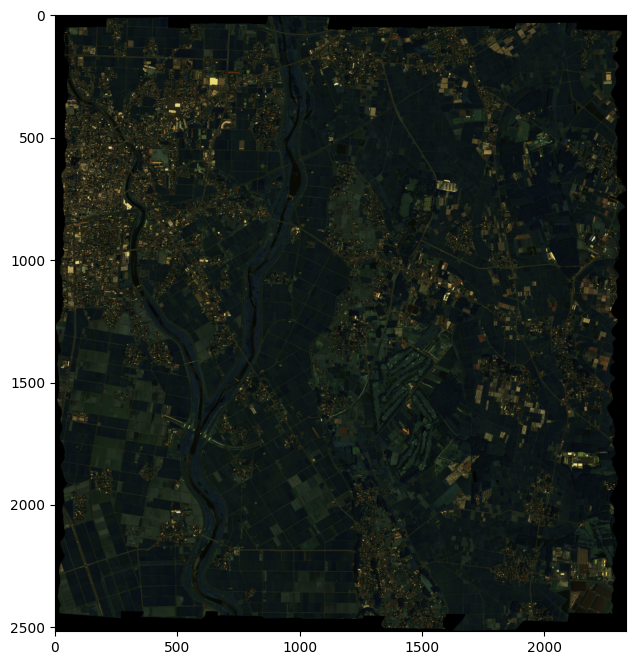

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(image_to_plot, vmin=0, vmax=image_to_plot.max())
np.max(image_to_plot)

In [21]:
from skimage.transform import resize
from scipy.ndimage import gaussian_filter

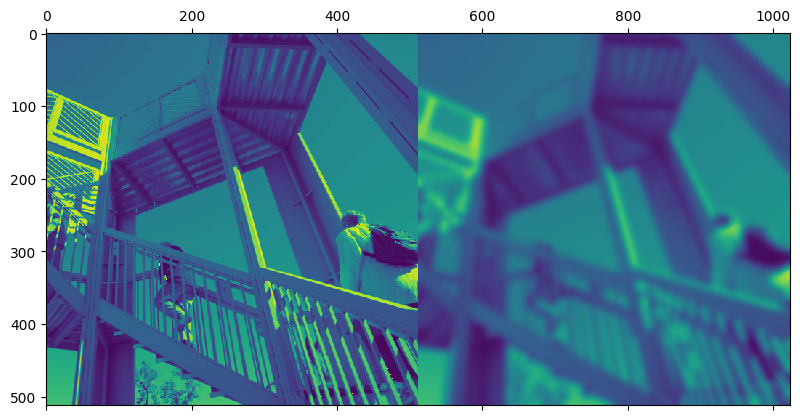

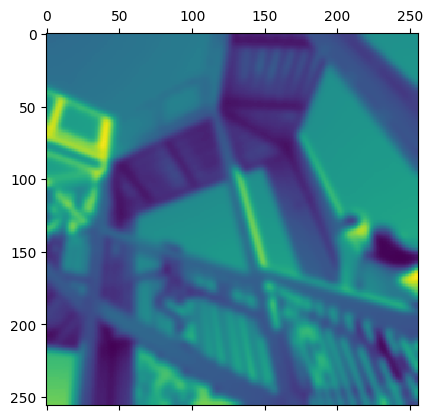

In [42]:
# Blur testing
from scipy import datasets
ascent = datasets.ascent()
result = gaussian_filter(ascent, sigma=5)
plt.matshow(np.concat([ascent,result],axis=1))
plt.show()

# Downsampling testing
plt.matshow(result[::2,::2])
plt.show()

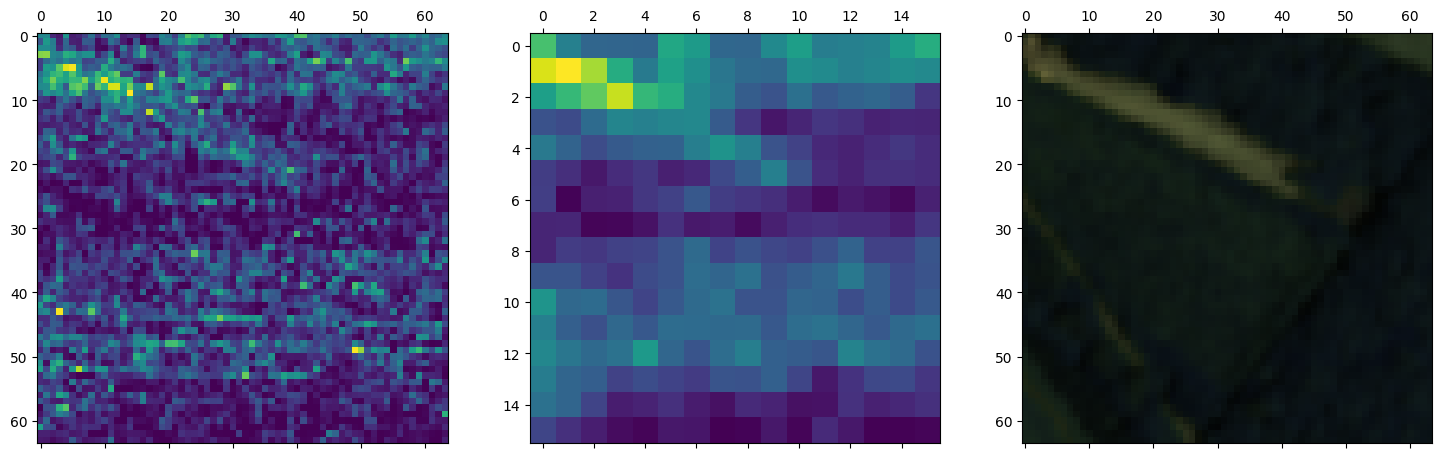

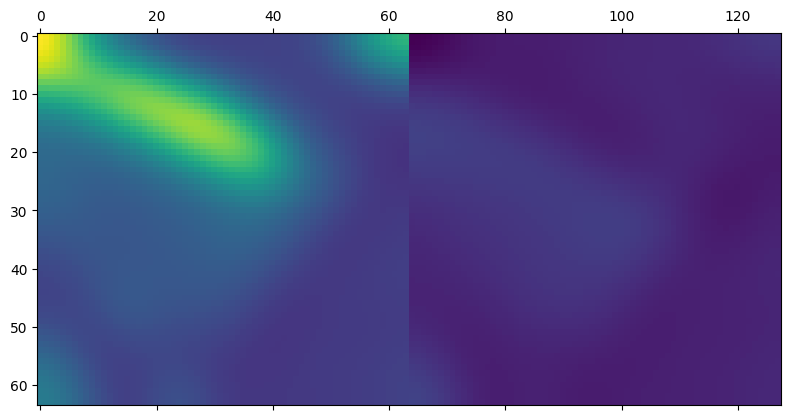

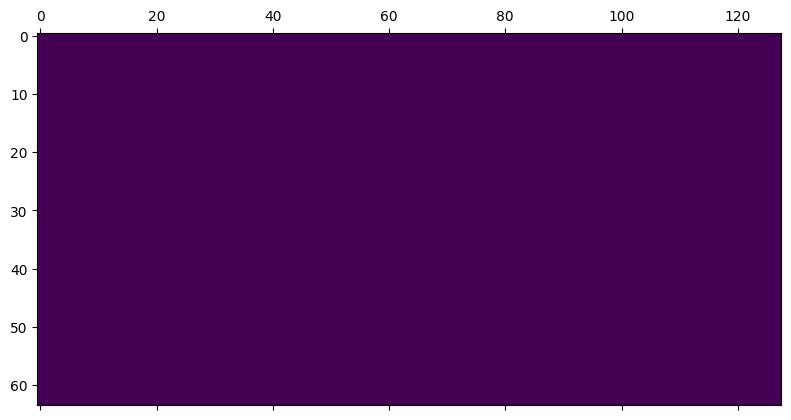

In [46]:
# Pick a Chikusei sample 64x64
x, y = 1500, 1500
res = 64
scale = 4
subres = res/scale
gt_chikusei = hyperspectral_data[:,x:x+64,y:y+64]

# Degrade spatial resolution
gt_chikusei = rearrange(gt_chikusei,'c h w -> h w c')
gt_chikusei.shape

degradation_method = 1

match degradation_method:
    case 1:
        lr_hs_chikusei = resize(gt_chikusei, (16, 16, gt_chikusei.shape[-1]), anti_aliasing=True)
    case 2:
        print("toto")
        #downsampled_image = blurred_image[::2, ::2]
    case _:
        print("No image degradation passed")


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18,6)
ax1.matshow(gt_chikusei[:,:,0])
ax2.matshow(lr_hs_chikusei[:,:,0])
ax3.matshow(image_to_plot[x:x+64,y:y+64,:])
plt.show()

# Approach 1
blurred_gt = gaussian_filter(image_to_plot[x:x+64,y:y+64,:],sigma=5, axes=(0,1))
plt.matshow(np.concat([blurred_gt[:,:,0],blurred_gt[:,:,1]-blurred_gt[:,:,0]],axis=1))
plt.show()

# Approach 2
blurred_gt2 = np.zeros((64,64,3))
for i in range(3):
    blurred_gt2[:,:,i] = gaussian_filter(image_to_plot[x:x+64,y:y+64,i],sigma=5)
plt.matshow(np.concat([blurred_gt2[:,:,0]-blurred_gt[:,:,0],blurred_gt2[:,:,1]-blurred_gt[:,:,1]],axis=1))
plt.show()


#### KAN training on Chikusei

In [23]:
import logging
import os
import time
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
from utils import Metric,get_model_size,test_speed, set_logger,init_weights,set_seed
from datetime import datetime

HSI_bands = gt_chikusei.shape[2]
chikusei_KAN = KANFormer(HSI_bands=HSI_bands,MSI_bands=3,hidden_dim=256,scale=4,depth=4,image_size=64)
chikusei_KAN = chikusei_KAN.to(device)

start_epoch = 0
epochs = 1000
batch_size = 32
lr = 4e-4
loss_func = torch.nn.L1Loss()
optimizer = torch.optim.Adam(lr=lr,params=chikusei_KAN.parameters())
scheduler = StepLR(optimizer=optimizer,step_size=100,gamma=0.1)
train_dataloader = DataLoader(train_dataset,batch_size=batch_size,drop_last=True,shuffle=True)

model_name = 'KANFormer'
scale = 4
dataset = 'chikusei'
now = str(datetime.now()) # current date and time

inference_time,flops,params = test_speed(chikusei_KAN,device,HSI_bands,scale=scale)

# Logs
log_dir = f'./trained_models/{model_name}_x{scale}_{dataset},{now}'
log_out = 1
if not os.path.exists(log_dir) and log_out == 1:
        os.mkdir(log_dir)
logger = set_logger(model_name, log_dir, log_out)
model_size = get_model_size(model)
logger.info(f'[model:{model_name}_x{scale},dataset:{dataset}],model_size:{params}M,inference_time:{inference_time:.6f}S,FLOPs:{flops}G')

def train(epochs: int,):
    model.train()
    for epoch in range(epochs):
        loss_list = []
        start_time = time.time()
        for idx,loader_data in enumerate(train_dataloader):
            GT,LRHSI,RGB = loader_data[0].to(device),loader_data[1].to(device),loader_data[2].to(device)
            preHSI = chikusei_KAN(LRHSI,RGB)
            loss = loss_func(GT,preHSI) #+chikusei_KAN.regularization_loss()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())
        scheduler.step()
        logging.info(f'Epoch:{epoch},loss:{np.mean(loss_list)},time:{time.time()-start_time:.2f}s')

device(type='cuda')

#### KAN testing on Chikusei

In [26]:
# Chikusei sample fusion
print("current device", device)
chikusei_KAN = KANFormer(HSI_bands=gt_chikusei.shape[2],MSI_bands=3,hidden_dim=256,scale=4,depth=4,image_size=64)
chikusei_KAN = chikusei_KAN.to(device)
model_dir = './trained_models/CAVEx4_epoch:999,PSNR:49.17.pth'
checkpoint = torch.load(model_dir)
chikusei_KAN.load_state_dict(checkpoint['net'], strict=False)
# Set for forward use
chikusei_KAN.eval()
hr_ms_chikusei = image_to_plot[x:x+64,y:y+64,:].reshape((1,3,64,64))
hr_ms_chikusei_torch = torch.tensor(hr_ms_chikusei, dtype=torch.float32).to(device)
lr_hs_chikusei_torch = torch.tensor(lr_hs_chikusei, dtype=torch.float32).to(device)

current device cuda


/tmp/ipykernel_393/3871275894.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_dir)


RuntimeError: Error(s) in loading state_dict for KANFormer:
	size mismatch for fusion.hsi_kan.base_weight: copying a param with shape torch.Size([256, 31]) from checkpoint, the shape in current model is torch.Size([256, 128]).
	size mismatch for fusion.hsi_kan.spline_weight: copying a param with shape torch.Size([256, 31, 8]) from checkpoint, the shape in current model is torch.Size([256, 128, 8]).
	size mismatch for fusion.hsi_kan.spline_scaler: copying a param with shape torch.Size([256, 31]) from checkpoint, the shape in current model is torch.Size([256, 128]).
	size mismatch for fusion.hsi_kan.grid: copying a param with shape torch.Size([31, 12]) from checkpoint, the shape in current model is torch.Size([128, 12]).
	size mismatch for refine.2.weight: copying a param with shape torch.Size([31, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 256, 3, 3]).
	size mismatch for refine.2.bias: copying a param with shape torch.Size([31]) from checkpoint, the shape in current model is torch.Size([128]).

In [ ]:
fused_chikusei = chikusei_KAN.forward(lr_hs_chikusei_torch, hr_ms_chikusei_torch)

## Format CAVE data

In [ ]:
# Todo: get dirs, load 31 pngs, make images

## Testing some metrics

In [ ]:
from utils import Metric
metric = Metric(gt,fused_image.squeeze(-1))
metric.calc_rmse()